# NLP Toolkits and Preprocessing Exercises

## Introduction

We will be using [review data from Kaggle](https://www.kaggle.com/snap/amazon-fine-food-reviews) to practice preprocessing text data. The dataset contains user reviews for many products, but today we'll be focusing on the product in the dataset that had the most reviews - an oatmeal cookie. 

The following code will help you load in the data. If this is your first time using nltk, you'll to need to pip install it first.

In [1]:
import nltk
# nltk.download() <-- Run this if it's your first time using nltk to download all of the datasets and models
nltk.download('punkt')
import pandas as pd
import matplotlib.pyplot as plt
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data = pd.read_csv('cookie_reviews.csv')
data.head

<bound method DataFrame.head of             user_id  stars                                            reviews
0    A368Z46FIKHSEZ      5  I love these cookies!  Not only are they healt...
1    A1JAPP1CXRG57A      5  Quaker Soft Baked Oatmeal Cookies with raisins...
2    A2Z9JNXPIEL2B9      5  I am usually not a huge fan of oatmeal cookies...
3    A31CYJQO3FL586      5  I participated in a product review that includ...
4    A2KXQ2EKFF3K2G      5  My kids loved these. I was very pleased to giv...
5    A2U5TAIAQ675BL      5  I really enjoyed these individually wrapped bi...
6    A1R4PIBZBD3NZ0      4  I was surprised at how soft the cookie was. I ...
7    A1ECQ8LJMXG4WI      5  Filled with oats and raisins you'll love this ...
8    A3MSG4E5MLI1XP      5  I was recently given a complimentary "vox box"...
9    A3BUDUV9GORLWH      5  the best and freshest cookie that comes in a p...
10   A3HW0FYDWOUP3D      5  I am a huge fan of the Quaker Chewy cookies! T...
11   A2AH0NQIVXE3HL      5  yumm

## Question 1 ##

* Determine how many reviews there are in total.
* Determine the percent of 1, 2, 3, 4 and 5 star reviews.
* Determine the distribution of character lengths for the reviews, by listing the values and by plotting a histogram.

In [3]:
len(data)

913

In [0]:
star = data.stars.value_counts()

In [0]:
pct = (star/star.sum())*100

In [6]:
pct

5    68.346112
4    23.767798
3     6.133625
2     1.314348
1     0.438116
Name: stars, dtype: float64

In [0]:
data['characterlength'] = data['reviews'].str.len()

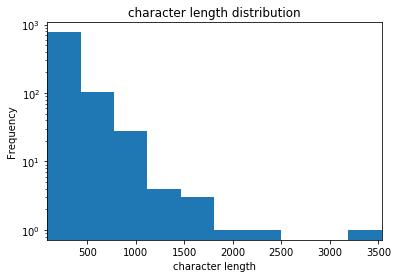

In [8]:
data.characterlength.plot(kind = 'hist', logy = True)
plt.xlim(data.characterlength.min(), data.characterlength.max())
plt.xlabel('character length')
plt.title('character length distribution')
plt.show()

## Question 2 ##

* Apply the following preprocessing steps:

     1. Remove all words that contain numbers
     2. Make all the text lowercase
     3. Remove punctuation
     4. Tokenize the reviews into words
     
  Hint #1: Use regular expressions.
  
  Hint #2: The cookie review in the second row has numbers, upper case letters and punctuation. You can use it to test out your regular expressions.
     
     
* Find the most common words.
* Determine the word length distribution over the entire corpus.

In [0]:
from nltk import regexp_tokenize
from nltk import wordpunct_tokenize
from nltk import word_tokenize

In [0]:
data.reviews = data.reviews.replace(regex = ['\d+'], value = '')
data.reviews = data.reviews.replace(regex = ['\w+\d+'], value = '')
data.reviews = data.reviews.replace(regex = ['\d+\w+'], value = '')
data.reviews = data.reviews.replace(regex = ['w+\d+\w+'], value = '')

In [0]:
data.reviews = data.reviews.str.lower()

In [0]:
data.reviews = data.reviews.str.replace('[^\w\s]','')

In [0]:
data.reviews = data.reviews.str.strip()

In [0]:
data['tokenized text']= data['reviews'].apply(word_tokenize)

In [15]:
data.head()

,user_id,stars,reviews,characterlength,tokenized text
0,A368Z46FIKHSEZ,5,i love these cookies not only are they health...,135,"[i, love, these, cookies, not, only, are, they..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,1316,"[quaker, soft, baked, oatmeal, cookies, with, ..."
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,261,"[i, am, usually, not, a, huge, fan, of, oatmea..."
3,A31CYJQO3FL586,5,i participated in a product review that includ...,530,"[i, participated, in, a, product, review, that..."
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to give...,169,"[my, kids, loved, these, i, was, very, pleased..."


## Question 3 ##

* Apply the following preprocessing techniques:

     * Remove stopwords
     * Perform parts of speech tagging
     * Perform stemming
     * Optional: Perform lemmatization

  Recommendation: Create a new column in your data set for every preprocessing technique you apply, so you can see the progression of the reviews text.

In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
stopwords = set(stopwords.words('english'))

In [0]:
data['filtered text'] = data['tokenized text'].apply(lambda x: [item for item in x if item not in stopwords])

In [19]:
data.head()

,user_id,stars,reviews,characterlength,tokenized text,filtered text
0,A368Z46FIKHSEZ,5,i love these cookies not only are they health...,135,"[i, love, these, cookies, not, only, are, they...","[love, cookies, healthy, taste, great, soft, d..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,1316,"[quaker, soft, baked, oatmeal, cookies, with, ...","[quaker, soft, baked, oatmeal, cookies, raisin..."
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,261,"[i, am, usually, not, a, huge, fan, of, oatmea...","[usually, huge, fan, oatmeal, cookies, literal..."
3,A31CYJQO3FL586,5,i participated in a product review that includ...,530,"[i, participated, in, a, product, review, that...","[participated, product, review, included, samp..."
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to give...,169,"[my, kids, loved, these, i, was, very, pleased...","[kids, loved, pleased, give, kids, quick, go, ..."


In [20]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
data['postags']= data['filtered text'].apply(
                 lambda row: [nltk.pos_tag(row) for item in row])

In [22]:
data.head()

,user_id,stars,reviews,characterlength,tokenized text,filtered text,postags
0,A368Z46FIKHSEZ,5,i love these cookies not only are they health...,135,"[i, love, these, cookies, not, only, are, they...","[love, cookies, healthy, taste, great, soft, d...","[[(love, VB), (cookies, NNS), (healthy, JJ), (..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,1316,"[quaker, soft, baked, oatmeal, cookies, with, ...","[quaker, soft, baked, oatmeal, cookies, raisin...","[[(quaker, NN), (soft, JJ), (baked, VBD), (oat..."
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,261,"[i, am, usually, not, a, huge, fan, of, oatmea...","[usually, huge, fan, oatmeal, cookies, literal...","[[(usually, RB), (huge, JJ), (fan, NN), (oatme..."
3,A31CYJQO3FL586,5,i participated in a product review that includ...,530,"[i, participated, in, a, product, review, that...","[participated, product, review, included, samp...","[[(participated, JJ), (product, NN), (review, ..."
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to give...,169,"[my, kids, loved, these, i, was, very, pleased...","[kids, loved, pleased, give, kids, quick, go, ...","[[(kids, NNS), (loved, VBD), (pleased, JJ), (g..."


# Stemming

In [23]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
stem = PorterStemmer()
woRdnet = WordNetLemmatizer()
snow = nltk.stem.SnowballStemmer('english')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
data['stemmed'] = data['filtered text'].apply(lambda x: [stem.stem(words) for words in x])

In [0]:
data['stemmed2'] = data['filtered text'].apply(lambda x: [snow.stem(words) for words in x])

In [0]:
data['lemmatized'] = data['filtered text'].apply(lambda x: [woRdnet.lemmatize(words) for words in x])

In [35]:
data.head()

,user_id,stars,reviews,characterlength,tokenized text,filtered text,postags,stemmed,stemmed2,lemmatized
0,A368Z46FIKHSEZ,5,i love these cookies not only are they health...,135,"[i, love, these, cookies, not, only, are, they...","[love, cookies, healthy, taste, great, soft, d...","[[(love, VB), (cookies, NNS), (healthy, JJ), (...","[love, cooki, healthi, tast, great, soft, defi...","[love, cooki, healthi, tast, great, soft, defi...","[love, cooky, healthy, taste, great, soft, def..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,1316,"[quaker, soft, baked, oatmeal, cookies, with, ...","[quaker, soft, baked, oatmeal, cookies, raisin...","[[(quaker, NN), (soft, JJ), (baked, VBD), (oat...","[quaker, soft, bake, oatmeal, cooki, raisin, d...","[quaker, soft, bake, oatmeal, cooki, raisin, d...","[quaker, soft, baked, oatmeal, cooky, raisin, ..."
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,261,"[i, am, usually, not, a, huge, fan, of, oatmea...","[usually, huge, fan, oatmeal, cookies, literal...","[[(usually, RB), (huge, JJ), (fan, NN), (oatme...","[usual, huge, fan, oatmeal, cooki, liter, melt...","[usual, huge, fan, oatmeal, cooki, liter, melt...","[usually, huge, fan, oatmeal, cooky, literally..."
3,A31CYJQO3FL586,5,i participated in a product review that includ...,530,"[i, participated, in, a, product, review, that...","[participated, product, review, included, samp...","[[(participated, JJ), (product, NN), (review, ...","[particip, product, review, includ, sampl, hre...","[particip, product, review, includ, sampl, hre...","[participated, product, review, included, samp..."
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to give...,169,"[my, kids, loved, these, i, was, very, pleased...","[kids, loved, pleased, give, kids, quick, go, ...","[[(kids, NNS), (loved, VBD), (pleased, JJ), (g...","[kid, love, pleas, give, kid, quick, go, healt...","[kid, love, pleas, give, kid, quick, go, healt...","[kid, loved, pleased, give, kid, quick, go, he..."


## Question 4 ##

* After going through these preprocessing steps, what are the most common words now? Do they make more sense?

In [0]:
from nltk.probability import FreqDist

In [0]:
mylist =[]
data['filtered text'].apply(lambda x: [mylist.append(item) for item in x])

In [43]:
mylist[0:5]

['love', 'cookies', 'healthy', 'taste', 'great']

In [0]:
frequency = FreqDist(mylist)

In [39]:
print(frequency)

<FreqDist with 2819 samples and 23824 outcomes>


In [40]:
frequency.most_common(5)

[('cookies', 835),
 ('cookie', 824),
 ('soft', 693),
 ('oatmeal', 479),
 ('good', 344)]

In [0]:
import matplotlib.pyplot as plt

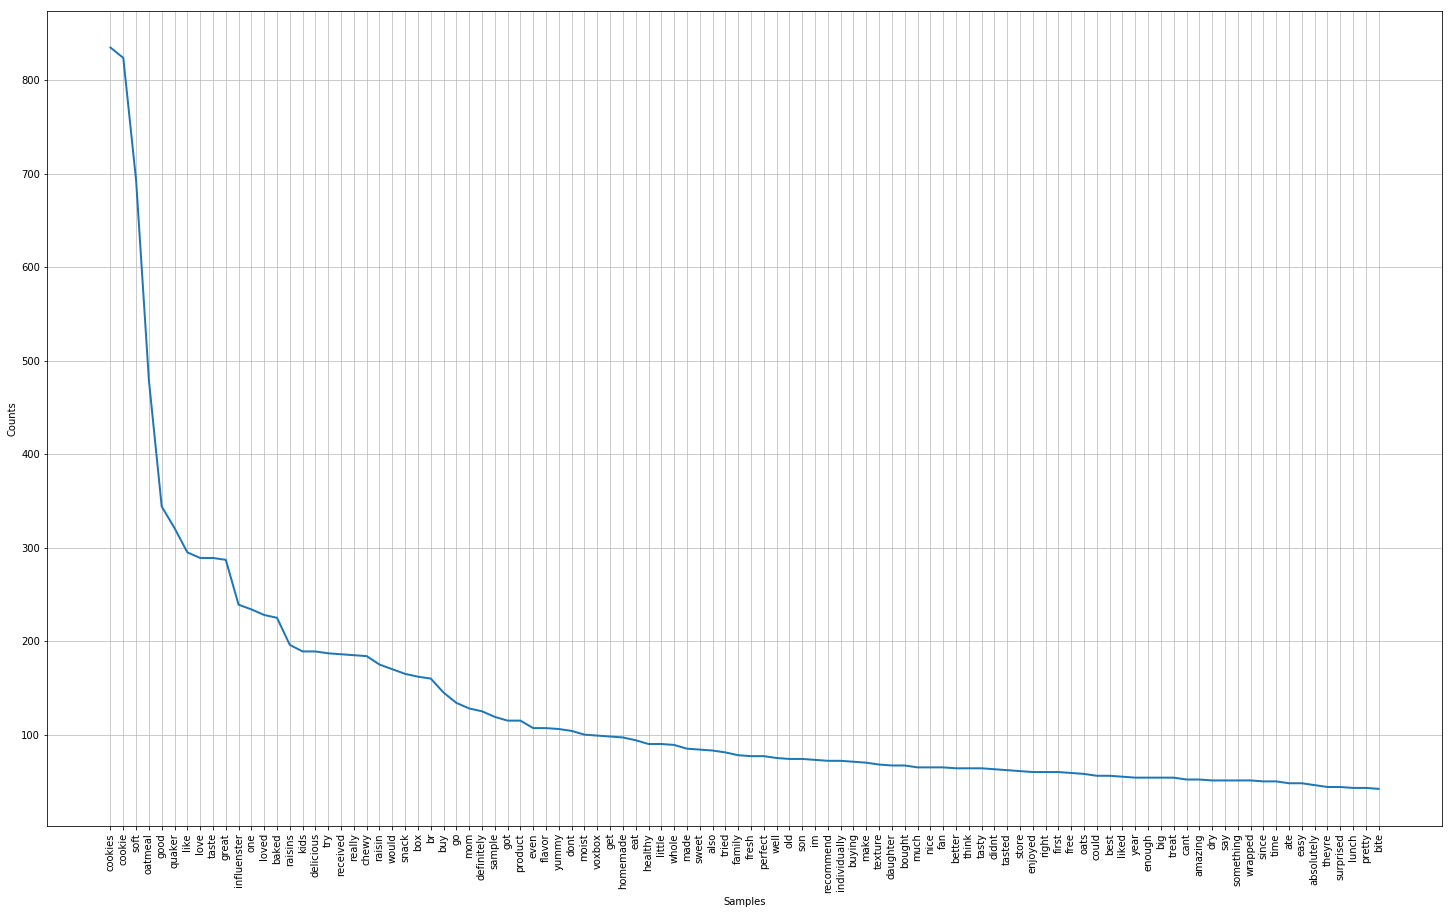

In [42]:
plt.figure(figsize =(25,15))
frequency.plot(100,cumulative = False)
plt.show()